
> **Author: Krithika Devi Chandran**


# Loading Libraries

In [26]:
# Import all the necessary files!
import os
import random
import numpy as np
import pandas as pd #for Reading CSV file
import matplotlib.pyplot as plt #for images Display
from matplotlib import image 

import tensorflow as tf 
from keras_preprocessing.image import ImageDataGenerator #Generating Images through Data Augmentation 
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint #CallBacks
from tensorflow.keras import models,layers,optimizers

#For Transfer Learning Technique
from tensorflow.keras.applications.inception_v3 import InceptionV3

import warnings
warnings.filterwarnings('ignore')

# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip "/content/drive/My Drive/animal_dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: animal_dataset/animal_dataset/train/farfalla_train/OIP-Zwx7FIbZrHjfsg055rw_BAHaE7.jpeg  
  inflating: animal_dataset/animal_dataset/train/farfalla_train/OIP-ZXlslUCo82OOxHlAotqIvwHaEK.jpeg  
  inflating: animal_dataset/animal_dataset/train/farfalla_train/OIP-zXRXv9uF7qQJ1qJuigjULwHaFj.jpeg  
  inflating: animal_dataset/animal_dataset/train/farfalla_train/OIP-ZYoAuR6Ult0soCyXXy6S8AHaHd.jpeg  
  inflating: animal_dataset/animal_dataset/train/farfalla_train/OIP-zYTwzDLkk_kueB-NEvT14AHaE8.jpeg  
  inflating: animal_dataset/animal_dataset/train/mucca_train/OIP-017eIsUPeFIH7OtCeMhj5AHaFj.jpeg  
  inflating: animal_dataset/animal_dataset/train/mucca_train/OIP-06Pazp4Kke9y83IfdQ5vQwHaFT.jpeg  
  inflating: animal_dataset/animal_dataset/train/mucca_train/OIP-07UPZG9O1AAcXB0i9jhp_QHaFj.jpeg  
  inflating: animal_dataset/animal_dataset/train/mucca_train/OIP-15lW1zrbhXHtWlYA8ZXfOQHaFj.jpeg  
  inflating: animal_dataset/animal_dataset/

In [4]:
train_dir = "animal_dataset/animal_dataset/train"
test_dir = "animal_dataset/animal_dataset/test"

In [5]:
print('total classes in training set', len(os.listdir(train_dir))) # No of Training Classess
print('total testing images:', len(os.listdir(test_dir))) #Number of Testing Images

total classes in training set 5
total testing images: 910


In [6]:
#List of All the Classes Present in Training Directory
train_classes = os.listdir(train_dir)
train_classes

['farfalla_train',
 'pecora_train',
 'mucca_train',
 'elefante_train',
 'scoiattolo_train']

In [7]:
train_dir

'animal_dataset/animal_dataset/train'

In [8]:
# creating directory for each class & getting names of all classes
dir=[]
names=[]
print("Total image of each class in training directory:\n")
for i,classes in enumerate(train_classes):
  dir.append(os.path.join(train_dir+"/"+classes)) #Creating Directory for Each class in Training Data
  names.append(os.listdir(train_dir+"/"+classes)) # Getting all images in each Directory
  print('Total Images of {}  is {}'.format(classes,len(names[i]))) 

Total image of each class in training directory:

Total Images of farfalla_train  is 1901
Total Images of pecora_train  is 1639
Total Images of mucca_train  is 1680
Total Images of elefante_train  is 1302
Total Images of scoiattolo_train  is 1676


In [9]:
dir

['animal_dataset/animal_dataset/train/farfalla_train',
 'animal_dataset/animal_dataset/train/pecora_train',
 'animal_dataset/animal_dataset/train/mucca_train',
 'animal_dataset/animal_dataset/train/elefante_train',
 'animal_dataset/animal_dataset/train/scoiattolo_train']

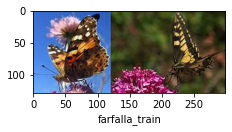

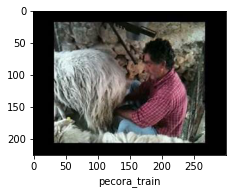

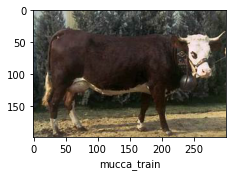

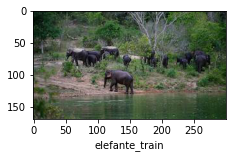

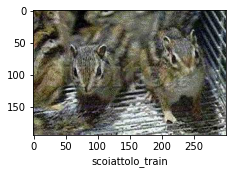

In [10]:
for i in range(len(train_classes)):
  plt.figure(figsize=(20,20))
  plt.subplot(1,5,i+1)
  pics = [os.path.join(dir[i], fname) for fname in names[i][:1]]
  for img_path in pics:  
    img = image.imread(img_path)
    plt.imshow(img)
    plt.xlabel(train_classes[i])

In [11]:
img_size = 224
batch_size = 32

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255., # normalize each value for each pixel for the entire vector for each input, 
                                                                                   # by converting into float value
                                   rotation_range = 40,  # for augmentation
                                   width_shift_range = 0.2,
                                   validation_split = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255.,validation_split = 0.2)

In [12]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = batch_size,
                                                    subset="training",
                                                    class_mode = 'categorical', 
                                                    target_size = (img_size, img_size))

val_generator = val_datagen.flow_from_directory(train_dir,
                                                subset = "validation",
                                                batch_size = batch_size,
                                                class_mode = 'categorical', 
                                                target_size = (img_size, img_size))

Found 6558 images belonging to 5 classes.
Found 1638 images belonging to 5 classes.


In [13]:
print("shape of the data: ", train_generator.image_shape)

shape of the data:  (224, 224, 3)


# Multi-layer perceptron

In [14]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(224,224,3)))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.2)) 
model.add(layers.Dense(128, activation="relu")) 
model.add(layers.Dense(128, activation="relu")) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation="relu")) 
model.add(layers.Dense(64, activation="relu")) 
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(5, activation="softmax"))

In [15]:
# Summarize the built model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 256)               38535424  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [16]:
# Let's use the Adam optimizer for learning
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', metrics=['accuracy'])

In [17]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [18]:
history_mlp = model.fit(train_generator, epochs=100,
          validation_data = val_generator,
         callbacks = [early_stop])

Epoch 1/100
205/205 [==============================] - 92s 442ms/step - loss: 2.3049 - accuracy: 0.2020 - val_loss: 1.6044 - val_accuracy: 0.2320
Epoch 2/100
205/205 [==============================] - 88s 432ms/step - loss: 1.6055 - accuracy: 0.2199 - val_loss: 1.5972 - val_accuracy: 0.2320
Epoch 3/100
205/205 [==============================] - 82s 398ms/step - loss: 1.5915 - accuracy: 0.2280 - val_loss: 1.5603 - val_accuracy: 0.2320
Epoch 4/100
205/205 [==============================] - 78s 383ms/step - loss: 1.5870 - accuracy: 0.2289 - val_loss: 1.5769 - val_accuracy: 0.2320
Epoch 5/100
205/205 [==============================] - 77s 378ms/step - loss: 1.5715 - accuracy: 0.2582 - val_loss: 1.5607 - val_accuracy: 0.2656
Epoch 6/100
205/205 [==============================] - 76s 373ms/step - loss: 1.5704 - accuracy: 0.2591 - val_loss: 1.5476 - val_accuracy: 0.2668
Epoch 7/100
205/205 [==============================] - 78s 379ms/step - loss: 1.5705 - accuracy: 0.2630 - val_loss: 1.5679 -

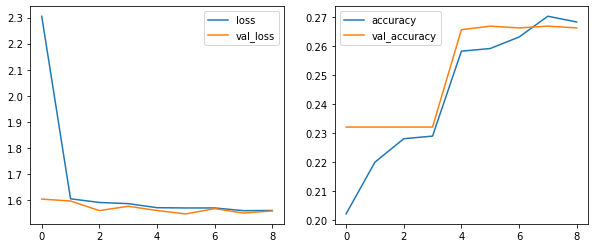

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_mlp = pd.DataFrame(history_mlp.history)
history_mlp[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_mlp[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

# Transfer Learning

## InceptionV3

In [76]:
inception_layers = InceptionV3(weights='imagenet', include_top=False, input_shape=train_generator.image_shape)
inception_layers.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_564 (Conv2D)            (None, 111, 111, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_564 (Batch  (None, 111, 111, 32  96         ['conv2d_564[0][0]']             
 Normalization)                 )                                                      

In [77]:
model_inception = models.Sequential()

# Add the vgg convolutional base model
model_inception.add(inception_layers)

# add flatten layer
model_inception.add(layers.Flatten())

# add dense layers with some dropout
model_inception.add(layers.Dense(512, activation='relu'))
model_inception.add(layers.Dense(256, activation='relu'))
model_inception.add(layers.Dropout(rate=0.2))
model_inception.add(layers.Dense(256, activation='relu'))
model_inception.add(layers.Dropout(rate=0.2))

# add output layer
model_inception.add(tf.keras.layers.Dense(5, activation='softmax'))

# compile model
model_inception.compile(optimizer="adam", 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
# view model layers
model_inception.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_10 (Flatten)        (None, 51200)             0         
                                                                 
 dense_50 (Dense)            (None, 512)               26214912  
                                                                 
 dense_51 (Dense)            (None, 256)               131328    
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_52 (Dense)            (None, 256)               65792     
                                                                 
 dropout_15 (Dropout)        (None, 256)             

In [62]:
history_inception = model_inception.fit(train_generator,
            validation_data = val_generator,
            epochs = 30, callbacks = [early_stop])

Epoch 1/30
205/205 [==============================] - 108s 476ms/step - loss: 1.4147 - accuracy: 0.4503 - val_loss: 2.4059 - val_accuracy: 0.3449
Epoch 2/30
205/205 [==============================] - 95s 464ms/step - loss: 0.8828 - accuracy: 0.6267 - val_loss: 2.4112 - val_accuracy: 0.4927
Epoch 3/30
205/205 [==============================] - 94s 460ms/step - loss: 0.6860 - accuracy: 0.7667 - val_loss: 1.4595 - val_accuracy: 0.7210
Epoch 4/30
205/205 [==============================] - 96s 466ms/step - loss: 0.5543 - accuracy: 0.8230 - val_loss: 1.2806 - val_accuracy: 0.6575
Epoch 5/30
205/205 [==============================] - 96s 467ms/step - loss: 0.4853 - accuracy: 0.8387 - val_loss: 1.0466 - val_accuracy: 0.6484
Epoch 6/30
205/205 [==============================] - 94s 460ms/step - loss: 0.5169 - accuracy: 0.8317 - val_loss: 144.7403 - val_accuracy: 0.2033
Epoch 7/30
205/205 [==============================] - 96s 466ms/step - loss: 0.4552 - accuracy: 0.8458 - val_loss: 1.8282 - val

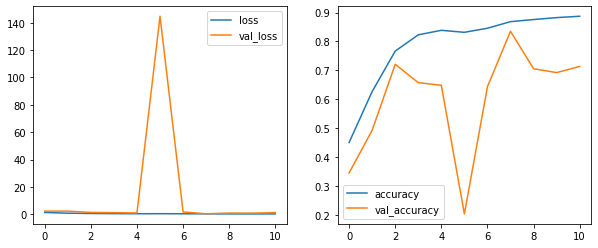

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history_inception.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

# Finetuning the Hyperparameters

`PiecewiseConstantDecay` has a larger proportion of small learning rates, as such a more stable system can be achieved.


In [66]:
lr = 0.01 * batch_size / 224 

lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=[4,8,12], 
                                                                   values=[lr, lr*0.01, lr*0.001, lr*0.0001])


In [67]:
model_inception.compile(optimizer=optimizers.Adam(learning_rate=lr_schedule),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
history_inception_tuned = model_inception.fit(
            train_generator,
            validation_data = val_generator,
            epochs = 10)

Epoch 1/10
205/205 [==============================] - 112s 508ms/step - loss: 0.4249 - accuracy: 0.8532 - val_loss: 0.3252 - val_accuracy: 0.8889
Epoch 2/10
205/205 [==============================] - 95s 463ms/step - loss: 0.4192 - accuracy: 0.8554 - val_loss: 0.3235 - val_accuracy: 0.8907
Epoch 3/10
205/205 [==============================] - 96s 466ms/step - loss: 0.4121 - accuracy: 0.8570 - val_loss: 0.3256 - val_accuracy: 0.8895
Epoch 4/10
205/205 [==============================] - 95s 461ms/step - loss: 0.4239 - accuracy: 0.8564 - val_loss: 0.3239 - val_accuracy: 0.8901
Epoch 5/10
205/205 [==============================] - 96s 470ms/step - loss: 0.4147 - accuracy: 0.8593 - val_loss: 0.3222 - val_accuracy: 0.8907
Epoch 6/10
205/205 [==============================] - 95s 463ms/step - loss: 0.4095 - accuracy: 0.8580 - val_loss: 0.3192 - val_accuracy: 0.8907
Epoch 7/10
205/205 [==============================] - 96s 469ms/step - loss: 0.4078 - accuracy: 0.8596 - val_loss: 0.3210 - val_a

In [70]:
history_inception_tuned = model_inception.fit(
            train_generator,
            validation_data = val_generator,
            epochs = 5)

Epoch 1/5
205/205 [==============================] - 101s 492ms/step - loss: 0.3899 - accuracy: 0.8676 - val_loss: 0.3147 - val_accuracy: 0.8932
Epoch 2/5
205/205 [==============================] - 95s 464ms/step - loss: 0.4004 - accuracy: 0.8643 - val_loss: 0.3135 - val_accuracy: 0.8926
Epoch 3/5
205/205 [==============================] - 97s 471ms/step - loss: 0.4081 - accuracy: 0.8631 - val_loss: 0.3138 - val_accuracy: 0.8926
Epoch 4/5
205/205 [==============================] - 95s 464ms/step - loss: 0.3941 - accuracy: 0.8611 - val_loss: 0.3115 - val_accuracy: 0.8926
Epoch 5/5
205/205 [==============================] - 96s 469ms/step - loss: 0.3944 - accuracy: 0.8654 - val_loss: 0.3139 - val_accuracy: 0.8926


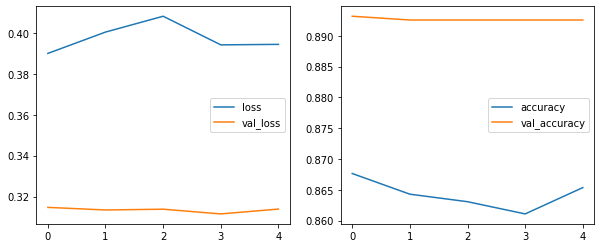

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df1 = pd.DataFrame(history_inception_tuned.history)
history_df1[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df1[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

In [73]:
loss, accuracy = model_inception.evaluate(val_generator)
print('Test accuracy :', accuracy)

52/52 [==============================] - 5s 85ms/step - loss: 0.3139 - accuracy: 0.8926
Test accuracy : 0.8925518989562988


In [74]:
label = val_generator.classes
pred = model_inception.predict(val_generator)
pred_class = np.argmax(pred,axis=1)

52/52 [==============================] - 6s 84ms/step


In [75]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(label, pred_class)
cf

array([[61, 62, 40, 44, 53],
       [58, 90, 81, 62, 89],
       [65, 67, 77, 56, 71],
       [58, 87, 54, 55, 73],
       [64, 83, 65, 65, 58]])